# Naive Bayes Classification

In [3]:
import os
import urllib

# Download the data
API_KEY = "PO6RG0NM9390YF3A"
STOCK_SYMBOL = "SPY"
INTERVAL = "1min"
DATA_TYPE = "WEEKLY" # INTRADAY || DAILY || WEEKLY || MONTHLY

if DATA_TYPE == "intraday":
    DOWNLOAD_ROOT = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={STOCK_SYMBOL}&interval={INTERVAL}&apikey={API_KEY}&datatype=csv&ouputsize=full"
else:
    DOWNLOAD_ROOT = f"https://www.alphavantage.co/query?function=TIME_SERIES_{DATA_TYPE}&symbol={STOCK_SYMBOL}&apikey={API_KEY}&datatype=csv&ouputsize=full"
filename = STOCK_SYMBOL+"_"+DATA_TYPE+".csv"
datapath = "rawdata/"
os.makedirs(datapath, exist_ok=True)
urllib.request.urlretrieve(DOWNLOAD_ROOT, datapath+filename)
print('Download complete.')

Download complete.


In [4]:
# Code example of load the data and prepared the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

# Load the data
stock_data = pd.read_csv(datapath + filename, thousands=',')

# reverse data so it is in ascending timestamp order
stock_data = stock_data.iloc[::-1]
print(stock_data)

       timestamp      open      high       low     close     volume
1042  2000-05-19  142.7500  147.7187  140.4062  141.1250   29384700
1041  2000-05-26  141.2500  141.8125  136.5000  138.0000   42993000
1040  2000-06-02  140.0000  149.0937  139.4687  147.8437   29343000
1039  2000-06-09  147.4687  148.2187  145.6250  146.5937   25584900
1038  2000-06-16  146.9687  148.8750  144.6250  146.5937   28107200
...          ...       ...       ...       ...       ...        ...
4     2020-04-09  257.8400  281.2000  248.1698  278.2000  728498717
3     2020-04-17  277.1400  287.3000  271.4100  286.6400  641620261
2     2020-04-24  282.6100  286.7912  272.0200  282.9700  506655211
1     2020-05-01  285.1200  294.8800  281.5200  282.7900  546963684
0     2020-05-08  280.7400  292.9500  279.1300  292.4400  374854032

[1043 rows x 6 columns]


In [5]:
label = []
for index, row in stock_data.iterrows():
    if row['close'] > row['open']:
        label.append('buy')
    else:
        label.append('sell')
stock_data['action'] = label
print(stock_data)

       timestamp      open      high       low     close     volume action
1042  2000-05-19  142.7500  147.7187  140.4062  141.1250   29384700   sell
1041  2000-05-26  141.2500  141.8125  136.5000  138.0000   42993000   sell
1040  2000-06-02  140.0000  149.0937  139.4687  147.8437   29343000    buy
1039  2000-06-09  147.4687  148.2187  145.6250  146.5937   25584900   sell
1038  2000-06-16  146.9687  148.8750  144.6250  146.5937   28107200   sell
...          ...       ...       ...       ...       ...        ...    ...
4     2020-04-09  257.8400  281.2000  248.1698  278.2000  728498717    buy
3     2020-04-17  277.1400  287.3000  271.4100  286.6400  641620261    buy
2     2020-04-24  282.6100  286.7912  272.0200  282.9700  506655211    buy
1     2020-05-01  285.1200  294.8800  281.5200  282.7900  546963684   sell
0     2020-05-08  280.7400  292.9500  279.1300  292.4400  374854032    buy

[1043 rows x 7 columns]


In [6]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [7]:
from matplotlib import cm

X = stock_data[['open','high','low','close','volume']]
y = stock_data['action']
#training set = 70% of dataset(seems to give best accuracy)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)

In [8]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

nbclf = GaussianNB().fit(X_train, y_train)

#plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test, 'Gaussian Naive Bayes classifier: Dataset 1')

In [9]:
nbclf.score(X_test, y_test)

0.5399361022364217

In [10]:
y_pred = nbclf.predict(X_test)

# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

[[142  10]
 [134  27]]


In [11]:
# Print classification report
target_names = ['Class 0', 'Class 1']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class 0       0.51      0.93      0.66       152
     Class 1       0.73      0.17      0.27       161

    accuracy                           0.54       313
   macro avg       0.62      0.55      0.47       313
weighted avg       0.63      0.54      0.46       313



## ROC Curve

y_score =  [0.38400086 0.7542049  0.4920448  0.38562783 0.59091993 0.39416335
 0.42310855 0.95218533 0.42911921 0.41097884 0.42685868 0.38724769
 0.38630364 0.38786394 0.38340439 0.39235522 0.38523117 0.59941284
 0.45131589 0.3881744  0.38494681 0.43402282 0.47246033 0.54385043
 0.38515675 0.42375927 0.424269   0.42821126 0.40091995 0.42202855
 0.38808523 0.39069271 0.39450912 0.40609071 0.39563929 0.38345866
 0.39624532 0.42609961 0.40427027 0.99326116 0.44247622 0.38339607
 0.38516434 0.38649668 0.40447157 0.41847802 0.41296137 0.38558678
 0.39896589 0.45413662 0.41241765 0.38594788 0.39059706 0.42909884
 0.42847413 0.40450684 0.43207121 0.38654093 0.39402437 0.44651185
 0.38527013 0.68919173 0.40600445 0.5190466  0.39383502 0.38916568
 0.69553707 0.92828518 0.39684588 0.42122045 0.40902382 0.38814539
 0.38985594 0.38428971 0.40505655 0.42389489 0.53369186 0.40248266
 0.39169756 0.41461277 0.38908825 0.38938003 0.39217341 0.39512859
 0.38351175 0.38862711 0.38379613 0.41314833 0.9742

/Users/dantemonaldo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


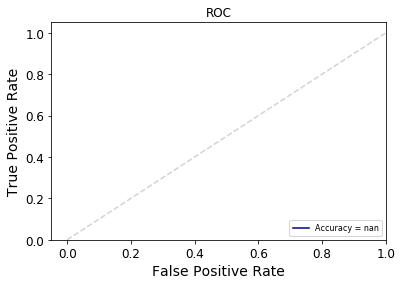

In [37]:
from sklearn.metrics import roc_curve, auc
y_score = nbclf.predict_proba(X_test)

# print('y_test ', y_test)
print('y_score = ', y_score[:,1])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1], pos_label=2)
# print('false positive = ', false_positive_rate)
print('true positive = ', true_positive_rate)
# print('thresholds = ', thresholds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('Accuracy = ', roc_auc)

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, c='navy', label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()